###Importing libraries

In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


###Load the dataset

In [100]:
df = pd.read_csv('/content/drive/MyDrive/internship/credit.csv')

###"First few rows of the dataset:"


In [101]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


###DATA PREPROCESSING

###Check for missing value

In [102]:
df.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

###Correlation between variables

In [103]:
df.corr()

<ipython-input-103-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
ID,1.000000,1.235872e-03,5.291503e-05,0.003338,1.170712e-02,-5.356989e-03,-0.004792,0.004826,-0.001900,3.956573e-03,...,-0.004730,0.001859,0.008670,-0.002201,2.941249e-03,-0.005402,-0.005604,-0.009127,-4.044109e-03,0.000859
Customer_ID,0.001236,1.000000e+00,-6.660113e-17,-0.002172,5.769305e-03,1.076923e-02,0.010196,-0.001189,-0.004601,-4.712091e-03,...,0.004581,0.005163,0.000660,0.000352,4.381594e-03,-0.002174,-0.014822,0.023904,1.632440e-02,-0.000922
Month,0.000053,-6.660113e-17,1.000000e+00,0.016990,-1.557496e-16,1.530483e-17,-0.001819,0.000079,0.000090,6.790115e-18,...,0.000342,0.000115,-0.000671,0.139604,3.200578e-17,0.002440,0.022784,0.049716,-1.043065e-16,-0.002095
Age,0.003338,-2.172258e-03,1.698955e-02,1.000000,-8.410995e-03,9.152456e-02,0.090636,-0.190415,-0.148567,-2.175571e-01,...,-0.174119,-0.184264,-0.157254,-0.250960,-2.023741e-01,0.025492,0.234618,-0.047334,7.104515e-02,0.116098
SSN,0.011707,5.769305e-03,-1.557496e-16,-0.008411,1.000000e+00,-8.041949e-03,-0.008367,0.011651,-0.004961,4.774004e-03,...,0.010697,0.013787,0.019752,-0.006684,2.950511e-03,0.002653,-0.003572,-0.004696,-2.951901e-03,-0.002724
Annual_Income,-0.005357,1.076923e-02,1.530483e-17,0.091525,-8.041949e-03,1.000000e+00,0.998154,-0.284060,-0.217852,-3.023524e-01,...,-0.250105,-0.286297,-0.176353,-0.280242,-2.693193e-01,0.175930,0.272374,0.438106,8.062806e-01,0.625640
Monthly_Inhand_Salary,-0.004792,1.019558e-02,-1.818625e-03,0.090636,-8.367089e-03,9.981538e-01,1.000000,-0.283181,-0.216847,-3.018580e-01,...,-0.249438,-0.285360,-0.176187,-0.279736,-2.690445e-01,0.176092,0.271457,0.421836,8.073264e-01,0.626631
Num_Bank_Accounts,0.004826,-1.188701e-03,7.909795e-05,-0.190415,1.165117e-02,-2.840602e-01,-0.283181,1.000000,0.442694,5.843015e-01,...,0.560193,0.601842,0.333794,0.518323,5.070634e-01,-0.071783,-0.485331,0.050035,-2.278278e-01,-0.286709
Num_Credit_Card,-0.001900,-4.600690e-03,8.973261e-05,-0.148567,-4.960946e-03,-2.178520e-01,-0.216847,0.442694,1.000000,4.979115e-01,...,0.479762,0.423300,0.255495,0.459429,4.903760e-01,-0.055249,-0.417205,0.058853,-1.746004e-01,-0.231913
Interest_Rate,0.003957,-4.712091e-03,6.790115e-18,-0.217557,4.774004e-03,-3.023524e-01,-0.301858,0.584302,0.497912,1.000000e+00,...,0.589185,0.571457,0.370156,0.632562,6.294144e-01,-0.075700,-0.576230,0.071651,-2.424790e-01,-0.317919


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Understanding the dataset

In [104]:
# Display the dimensions of the dataset
print("Shape of the dataset:", df.shape)


Shape of the dataset: (100000, 28)


In [105]:
print("First few rows of the dataset:")
df.head()

First few rows of the dataset:


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [106]:
# Summary statistics
print("Summary statistics:")
print(df.describe())

Summary statistics:
                  ID    Customer_ID          Month            Age  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean    80631.500000   25982.666640       4.500000      33.316340   
std     43301.486619   14340.543051       2.291299      10.764812   
min      5634.000000    1006.000000       1.000000      14.000000   
25%     43132.750000   13664.500000       2.750000      24.000000   
50%     80631.500000   25777.000000       4.500000      33.000000   
75%    118130.250000   38385.000000       6.250000      42.000000   
max    155629.000000   50999.000000       8.000000      56.000000   

                SSN  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
count  1.000000e+05  100000.000000          100000.000000      100000.000000   
mean   5.004617e+08   50505.123449            4197.270835           5.368820   
std    2.908267e+08   38299.422093            3186.432497           2.593314   
min    8.134900e+04    7005.930000    

###Exploratory Data Analysis(EDA)

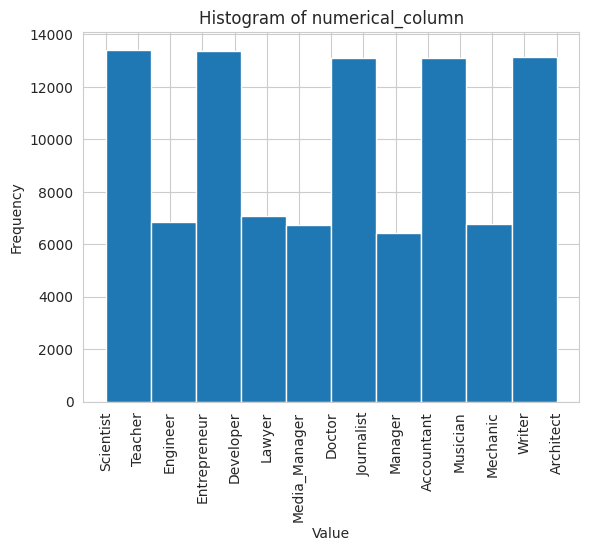

<Figure size 1000x800 with 0 Axes>

In [107]:
# Histogram of Occupation
plt.hist(df['Occupation'])
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.xticks(rotation = 90)
plt.title('Histogram of numerical_column')
plt.figure(figsize=(10, 8))
plt.show()

###Categorical Columns

In [108]:
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_columns)

Categorical columns: Index(['Name', 'Occupation', 'Type_of_Loan', 'Credit_Mix',
       'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score'],
      dtype='object')


###Outlier detection

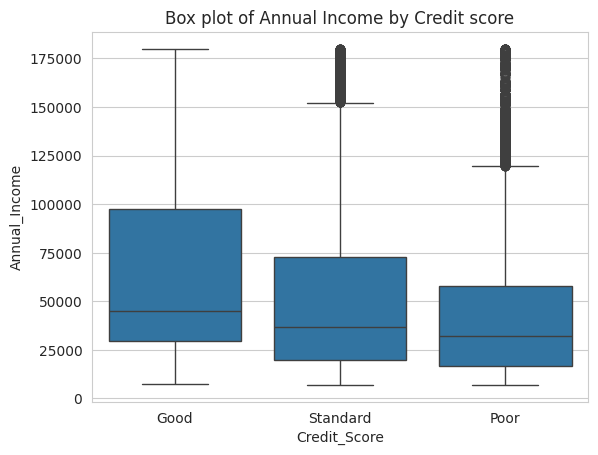

In [109]:
# Box plot of numerical_column by a categorical variable
sns.boxplot(x='Credit_Score', y='Annual_Income', data=df)
plt.title('Box plot of Annual Income by Credit score')
plt.show()

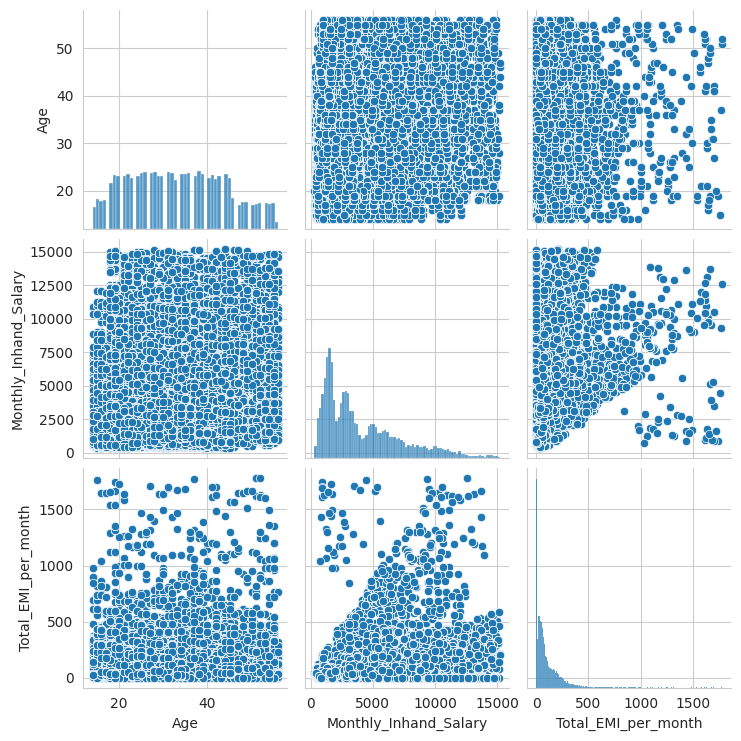

In [110]:
# Pair plot for numerical variables
sns.pairplot(df[['Age', 'Monthly_Inhand_Salary', 'Total_EMI_per_month']])
plt.show()

<ipython-input-111-34c2f36d20ce>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Credit_Score', y='Credit_History_Age', data=df, palette="Set2")


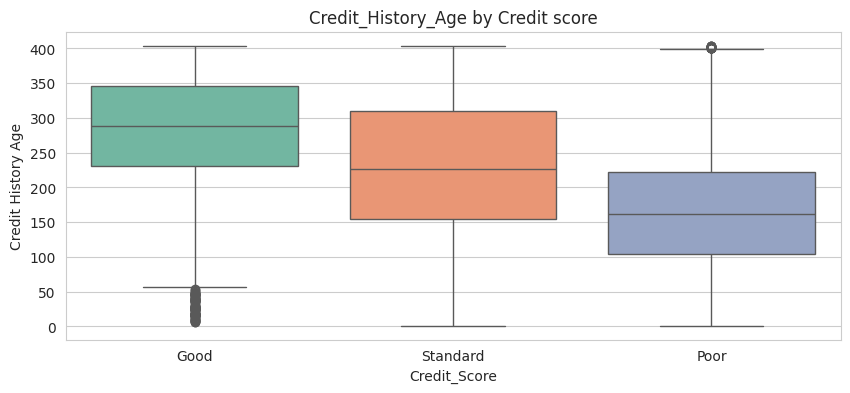

In [111]:
# Set the style of seaborn
sns.set_style("whitegrid")

# Create the box plot
plt.figure(figsize=(10, 4))
sns.boxplot(x='Credit_Score', y='Credit_History_Age', data=df, palette="Set2")
plt.title('Credit_History_Age by Credit score')
plt.xlabel('Credit_Score')
plt.ylabel('Credit History Age')
plt.show()

<ipython-input-112-33f28b569b89>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Occupation', y='Total_EMI_per_month', data=df, palette="Set2")


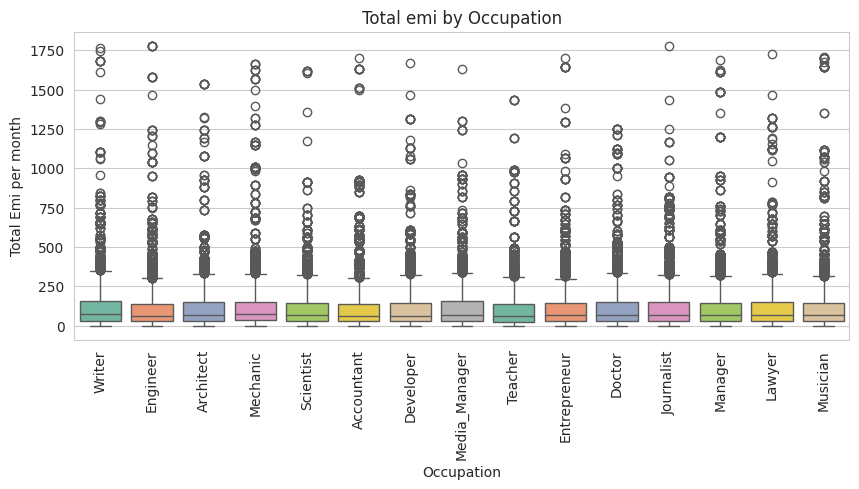

In [112]:
# Set the style of seaborn
sns.set_style("whitegrid")

# Create the box plot
plt.figure(figsize=(10, 4))
sns.boxplot(x='Occupation', y='Total_EMI_per_month', data=df, palette="Set2")
plt.title('Total emi by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Total Emi per month')
plt.xticks([0, 1,2,3,4,5,6,7,8,9,10,11,12,13,14], ['Writer', 'Engineer','Architect','Mechanic','Scientist','Accountant','Developer','Media_Manager','Teacher','Entrepreneur','Doctor','Journalist','Manager','Lawyer','Musician'], rotation = 90)
plt.show()

<ipython-input-113-f57aab9073fc>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Credit_Score', y='Interest_Rate', data=df, palette="Set2")


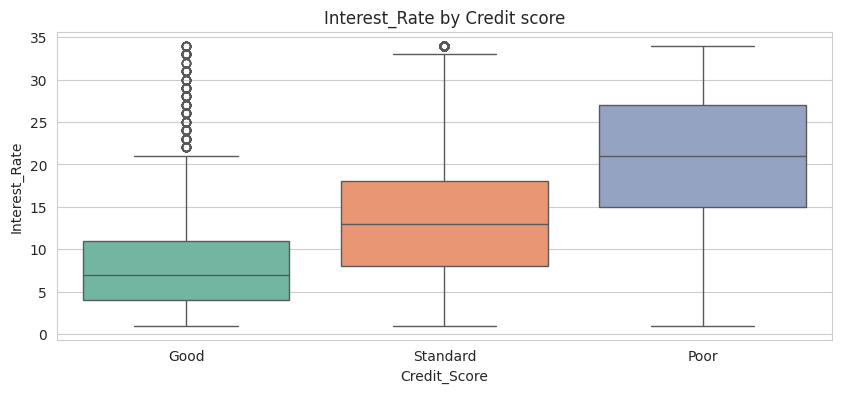

In [113]:
# Set the style of seaborn
sns.set_style("whitegrid")

# Create the box plot
plt.figure(figsize=(10, 4))
sns.boxplot(x='Credit_Score', y='Interest_Rate', data=df, palette="Set2")
plt.title('Interest_Rate by Credit score')
plt.xlabel('Credit_Score')
plt.ylabel('Interest_Rate')
plt.show()

<ipython-input-114-f6b1d8b8fad5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Credit_Score', y='Num_Bank_Accounts', data=df, palette="Set2")


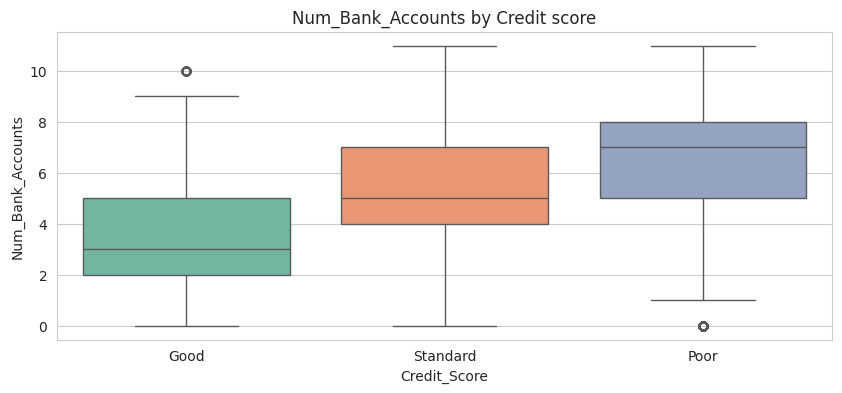

In [114]:
# Set the style of seaborn
sns.set_style("whitegrid")

# Create the box plot
plt.figure(figsize=(10, 4))
sns.boxplot(x='Credit_Score', y='Num_Bank_Accounts', data=df, palette="Set2")
plt.title('Num_Bank_Accounts by Credit score')
plt.xlabel('Credit_Score')
plt.ylabel('Num_Bank_Accounts')
plt.show()

<ipython-input-115-8e0380cfa7b1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Credit_Score', y='Annual_Income', data=df, palette="Set2")


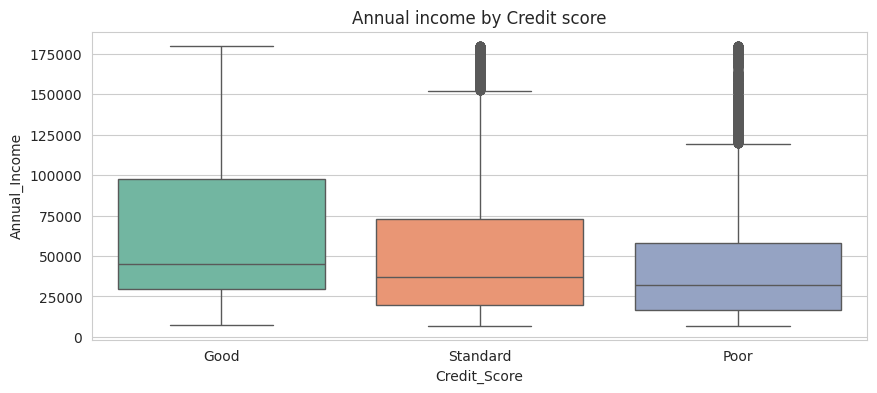

In [115]:
# Set the style of seaborn
sns.set_style("whitegrid")

# Create the box plot
plt.figure(figsize=(10, 4))
sns.boxplot(x='Credit_Score', y='Annual_Income', data=df, palette="Set2")
plt.title('Annual income by Credit score')
plt.xlabel('Credit_Score')
plt.ylabel('Annual_Income')
plt.show()

###Heatmap

<ipython-input-116-506030865bae>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


Correlation matrix:
                                ID   Customer_ID         Month       Age  \
ID                        1.000000  1.235872e-03  5.291503e-05  0.003338   
Customer_ID               0.001236  1.000000e+00 -6.660113e-17 -0.002172   
Month                     0.000053 -6.660113e-17  1.000000e+00  0.016990   
Age                       0.003338 -2.172258e-03  1.698955e-02  1.000000   
SSN                       0.011707  5.769305e-03 -1.557496e-16 -0.008411   
Annual_Income            -0.005357  1.076923e-02  1.530483e-17  0.091525   
Monthly_Inhand_Salary    -0.004792  1.019558e-02 -1.818625e-03  0.090636   
Num_Bank_Accounts         0.004826 -1.188701e-03  7.909795e-05 -0.190415   
Num_Credit_Card          -0.001900 -4.600690e-03  8.973261e-05 -0.148567   
Interest_Rate             0.003957 -4.712091e-03  6.790115e-18 -0.217557   
Num_of_Loan              -0.010136  1.482832e-02  1.555542e-16 -0.213533   
Delay_from_due_date      -0.004730  4.581213e-03  3.418202e-04 -0.17

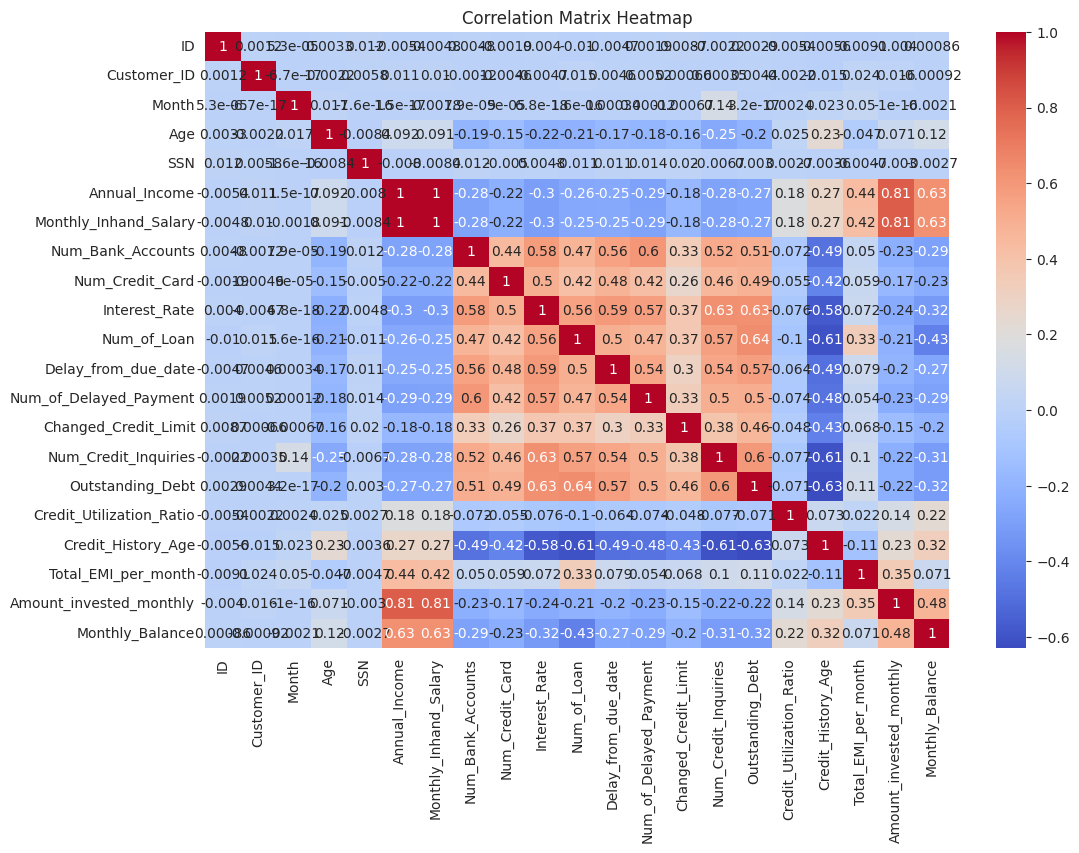

In [116]:
# Correlation matrix
correlation_matrix = df.corr()
print("Correlation matrix:")
print(correlation_matrix)

# Heatmap of correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

###Encoding categorical variables

In [117]:
from sklearn.preprocessing import LabelEncoder


In [118]:
label_encoder = LabelEncoder()

In [119]:
x = df

In [120]:
x.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [121]:
for col in x.columns:
    if x[col].dtype == 'object':
        x[col] = label_encoder.fit_transform(x[col])

In [122]:
x.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,11,23.0,821000265.0,12,19114.12,1824.843333,3.0,...,1,809.98,26.822620,265.0,1,49.574949,21.46538,2,312.494089,0
1,5635,3392,2,11,23.0,821000265.0,12,19114.12,1824.843333,3.0,...,1,809.98,31.944960,266.0,1,49.574949,21.46538,3,284.629162,0
2,5636,3392,3,11,23.0,821000265.0,12,19114.12,1824.843333,3.0,...,1,809.98,28.609352,267.0,1,49.574949,21.46538,4,331.209863,0
3,5637,3392,4,11,23.0,821000265.0,12,19114.12,1824.843333,3.0,...,1,809.98,31.377862,268.0,1,49.574949,21.46538,5,223.451310,0
4,5638,3392,5,11,23.0,821000265.0,12,19114.12,1824.843333,3.0,...,1,809.98,24.797347,269.0,1,49.574949,21.46538,1,341.489231,0


In [123]:
x.corr()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
ID,1.000000,1.235872e-03,5.291503e-05,-1.978273e-03,0.003338,1.170712e-02,-1.148139e-02,-5.356989e-03,-0.004792,0.004826,...,1.034260e-02,2.941249e-03,-0.005402,-0.005604,-0.003428,-0.009127,-4.044109e-03,-0.002116,0.000859,0.004672
Customer_ID,0.001236,1.000000e+00,-6.660113e-17,1.256133e-02,-0.002172,5.769305e-03,3.627336e-03,1.076923e-02,0.010196,-0.001189,...,-9.861451e-03,4.381594e-03,-0.002174,-0.014822,0.000679,0.023904,1.632440e-02,0.001486,-0.000922,-0.009946
Month,0.000053,-6.660113e-17,1.000000e+00,2.584431e-17,0.016990,-1.557496e-16,2.048899e-16,1.530483e-17,-0.001819,0.000079,...,-1.025995e-16,3.200578e-17,0.002440,0.022784,0.001287,0.049716,-1.043065e-16,0.004344,-0.002095,-0.038069
Name,-0.001978,1.256133e-02,2.584431e-17,1.000000e+00,-0.009940,2.102128e-02,1.193427e-02,-8.346456e-03,-0.008045,0.004109,...,-2.448342e-03,1.093386e-02,-0.001891,0.005594,0.003954,-0.002744,-1.511093e-02,0.003217,-0.003634,-0.001270
Age,0.003338,-2.172258e-03,1.698955e-02,-9.939577e-03,1.000000,-8.410995e-03,-3.965696e-03,9.152456e-02,0.090636,-0.190415,...,7.338015e-02,-2.023741e-01,0.025492,0.234618,-0.162497,-0.047334,7.104515e-02,-0.033357,0.116098,-0.058923
SSN,0.011707,5.769305e-03,-1.557496e-16,2.102128e-02,-0.008411,1.000000e+00,-8.698498e-03,-8.041949e-03,-0.008367,0.011651,...,9.036466e-03,2.950511e-03,0.002653,-0.003572,0.008168,-0.004696,-2.951901e-03,0.005605,-0.002724,0.011919
Occupation,-0.011481,3.627336e-03,2.048899e-16,1.193427e-02,-0.003966,-8.698498e-03,1.000000e+00,1.270171e-03,0.000763,0.010430,...,6.262513e-03,6.455418e-03,0.000197,-0.005178,-0.004319,0.000550,5.498126e-04,0.003785,-0.002208,0.005548
Annual_Income,-0.005357,1.076923e-02,1.530483e-17,-8.346456e-03,0.091525,-8.041949e-03,1.270171e-03,1.000000e+00,0.998154,-0.284060,...,9.399074e-02,-2.693193e-01,0.175930,0.272374,-0.194421,0.438106,8.062806e-01,-0.324406,0.625640,-0.080700
Monthly_Inhand_Salary,-0.004792,1.019558e-02,-1.818625e-03,-8.044685e-03,0.090636,-8.367089e-03,7.625631e-04,9.981538e-01,1.000000,-0.283181,...,9.364361e-02,-2.690445e-01,0.176092,0.271457,-0.193842,0.421836,8.073264e-01,-0.325978,0.626631,-0.078770
Num_Bank_Accounts,0.004826,-1.188701e-03,7.909795e-05,4.109160e-03,-0.190415,1.165117e-02,1.042960e-02,-2.840602e-01,-0.283181,1.000000,...,-2.287226e-01,5.070634e-01,-0.071783,-0.485331,0.364265,0.050035,-2.278278e-01,0.099795,-0.286709,0.177389


Correlation matrix:
                                ID   Customer_ID         Month          Name  \
ID                        1.000000  1.235872e-03  5.291503e-05 -1.978273e-03   
Customer_ID               0.001236  1.000000e+00 -6.660113e-17  1.256133e-02   
Month                     0.000053 -6.660113e-17  1.000000e+00  2.584431e-17   
Name                     -0.001978  1.256133e-02  2.584431e-17  1.000000e+00   
Age                       0.003338 -2.172258e-03  1.698955e-02 -9.939577e-03   
SSN                       0.011707  5.769305e-03 -1.557496e-16  2.102128e-02   
Occupation               -0.011481  3.627336e-03  2.048899e-16  1.193427e-02   
Annual_Income            -0.005357  1.076923e-02  1.530483e-17 -8.346456e-03   
Monthly_Inhand_Salary    -0.004792  1.019558e-02 -1.818625e-03 -8.044685e-03   
Num_Bank_Accounts         0.004826 -1.188701e-03  7.909795e-05  4.109160e-03   
Num_Credit_Card          -0.001900 -4.600690e-03  8.973261e-05  6.138253e-03   
Interest_Rate       

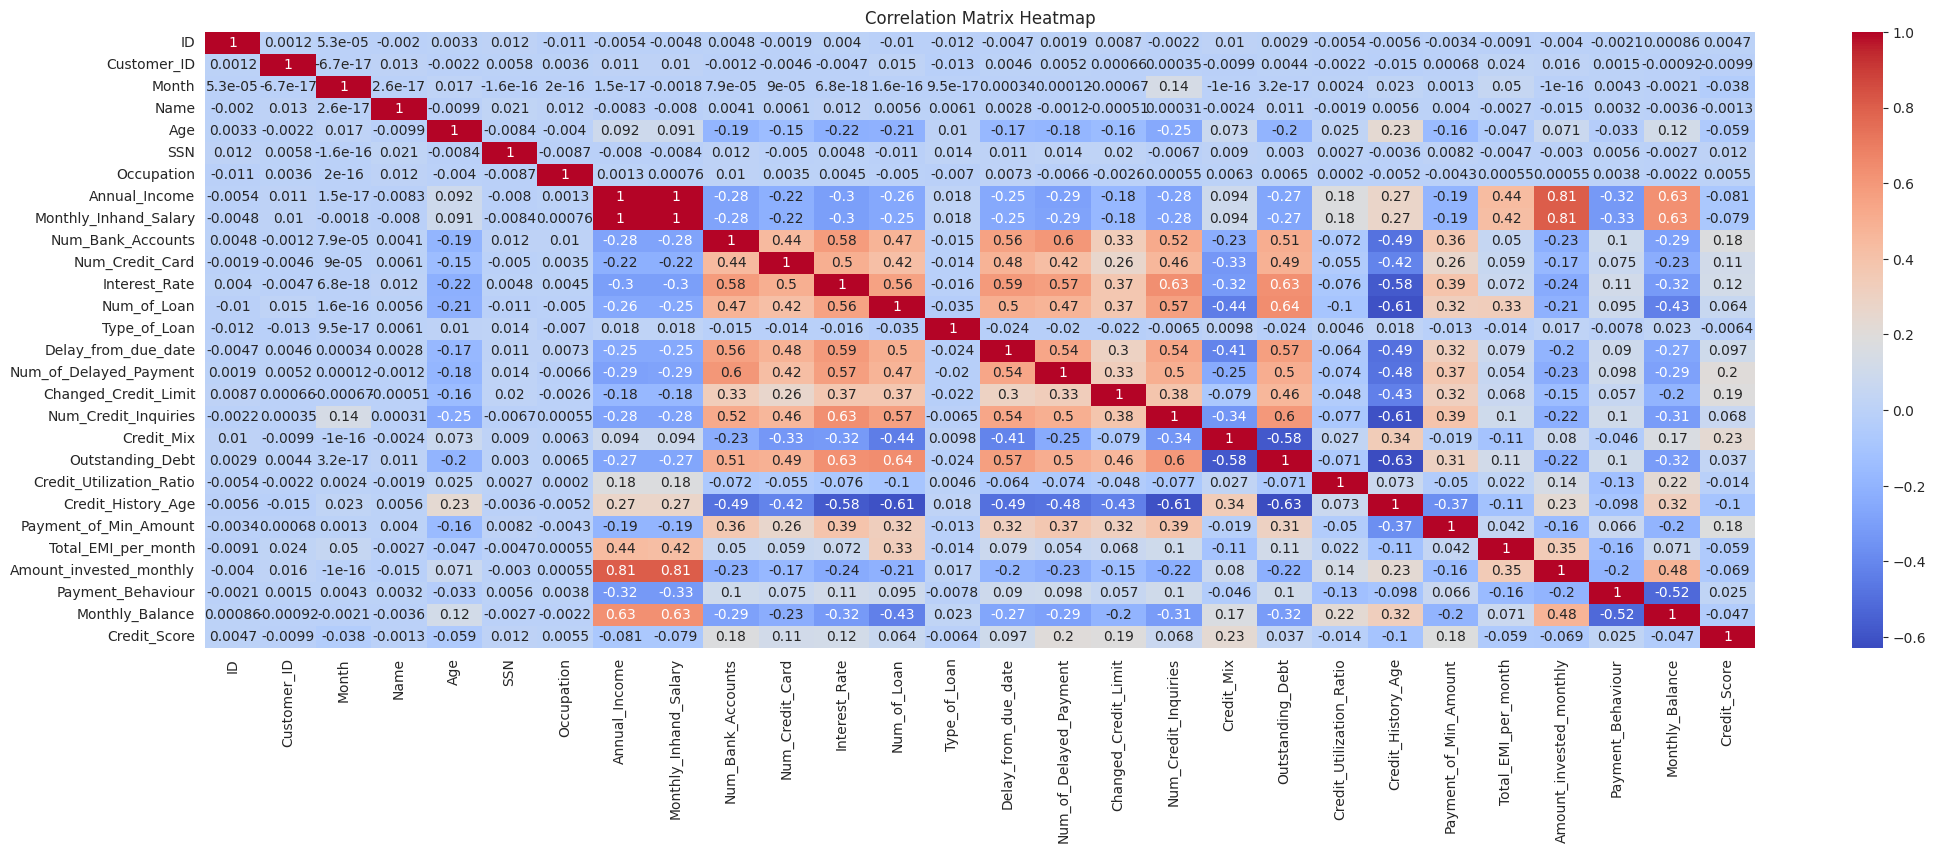

In [124]:
correlation_matrix = x.corr()
print("Correlation matrix:")
print(correlation_matrix)

# Example: Heatmap of correlation matrix
plt.figure(figsize=(25, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

###Data Split

###From correlation matrix Feature variables are chosen

In [125]:
x.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,11,23.0,821000265.0,12,19114.12,1824.843333,3.0,...,1,809.98,26.822620,265.0,1,49.574949,21.46538,2,312.494089,0
1,5635,3392,2,11,23.0,821000265.0,12,19114.12,1824.843333,3.0,...,1,809.98,31.944960,266.0,1,49.574949,21.46538,3,284.629162,0
2,5636,3392,3,11,23.0,821000265.0,12,19114.12,1824.843333,3.0,...,1,809.98,28.609352,267.0,1,49.574949,21.46538,4,331.209863,0
3,5637,3392,4,11,23.0,821000265.0,12,19114.12,1824.843333,3.0,...,1,809.98,31.377862,268.0,1,49.574949,21.46538,5,223.451310,0
4,5638,3392,5,11,23.0,821000265.0,12,19114.12,1824.843333,3.0,...,1,809.98,24.797347,269.0,1,49.574949,21.46538,1,341.489231,0


In [126]:
X = x[['SSN','Num_Bank_Accounts','Num_Credit_Card','Interest_Rate','Num_of_Loan','Delay_from_due_date','Num_of_Delayed_Payment','Changed_Credit_Limit','Credit_Mix','Outstanding_Debt','Payment_of_Min_Amount','Payment_Behaviour']]

In [127]:
X.head()

,SSN,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Payment_of_Min_Amount,Payment_Behaviour
0,821000265.0,3.0,4.0,3.0,4.0,3.0,7.0,11.27,1,809.98,1,2
1,821000265.0,3.0,4.0,3.0,4.0,3.0,4.0,11.27,1,809.98,1,3
2,821000265.0,3.0,4.0,3.0,4.0,3.0,7.0,11.27,1,809.98,1,4
3,821000265.0,3.0,4.0,3.0,4.0,5.0,4.0,6.27,1,809.98,1,5
4,821000265.0,3.0,4.0,3.0,4.0,6.0,4.0,11.27,1,809.98,1,1


In [128]:
y =df['Credit_Score']

In [129]:
X.shape

(100000, 12)

In [130]:
y.shape

(100000,)

In [131]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [132]:
# Split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)